You are given a task for students’ final grades prediction. You can start with loading the student performance
data csv file.
• Use the closed-form method to estimate the parameters of a linear regression model where Final Grade
is the target variable and the rest are predictors. Interpret the coefficients of the model. Which feature
has the most significant impact on?
• Check the assumptions of linear regression (linearity, independence, normality of residuals) using
appropriate statistical tests and visualizations. If any of the assumptions are violated, explain how
this could affect the model’s performance and what steps you could take to address these violations.
• Implement gradient descent from scratch to optimize the parameters of your linear regression model.
Compare the results to those obtained using the closed-form method. Discuss the impact of learning
rate on the convergence of the gradient descent algorithm. What strategies could you employ to choose
an appropriate learning rate?
• Split the dataset into training and testing sets. Train your final model on the training set and evaluate
its performance on the test set using metrics such as R-squared, Mean Absolute Error (MAE), and
Mean Squared Error (MSE). Create a residual plot and explain what it reveals about the model’s
performance. If necessary, suggest potential improvements.
Hint: Remember some preprocessing might be necessary, like outlier checking, feature selection, etc. Check
what a QQ plot is

In [60]:
import pandas as pd
#reading the data 
student_data_path = "/Users/agnesslungu/Downloads/student_grades.csv"
student_data = pd.read_csv(student_data_path)
student_data.head()

,hours_studied,attendance_rate,homework_score,test_score,class_participation,study_group_participation,previous_grade,sleep_hours,age,gender,favorite_subject,final_grade
0,4.370861,85.985866,3.318935,53.565660,22.677263,0,76.826280,8.536025,22,female,History,26.214684
1,9.556429,84.309472,30.394640,83.611770,66.652198,0,92.997036,6.713884,22,female,Science,44.589548
2,7.587945,80.507540,65.316279,82.138836,8.010573,0,60.651766,4.259022,19,female,Math,46.892416
3,6.387926,69.226792,93.830482,84.332617,44.183370,0,80.388922,5.857604,21,male,Science,57.301882
4,2.404168,67.061121,87.120448,48.509466,16.336676,1,54.189549,5.920661,18,male,Literature,37.824042


In [2]:
student_data.describe()

,hours_studied,attendance_rate,homework_score,test_score,class_participation,study_group_participation,previous_grade,sleep_hours,age,final_grade
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,5.453603,80.158753,49.429281,49.686674,49.267590,0.492209,74.906417,7.085225,21.071494,38.133647
std,2.647806,11.568667,28.895947,28.638031,28.806085,0.500169,14.225590,1.739512,1.937658,10.069027
min,1.041688,60.128731,0.001163,0.003072,0.022704,0.000000,50.031376,4.010872,18.000000,9.138650
25%,3.136990,69.664929,25.815943,25.027403,24.492137,0.000000,63.176389,5.616982,19.000000,31.685611
50%,5.513647,80.627177,49.381404,50.027854,47.698339,0.000000,75.267683,7.162884,21.000000,37.942923
75%,7.756686,90.155171,73.825743,74.763109,74.212456,1.000000,86.690919,8.615867,23.000000,44.389183
max,9.997459,99.976549,99.782086,99.955770,99.879294,1.000000,99.992462,9.998448,24.000000,97.285506


In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hours_studied              1091 non-null   float64
 1   attendance_rate            1091 non-null   float64
 2   homework_score             1091 non-null   float64
 3   test_score                 1091 non-null   float64
 4   class_participation        1091 non-null   float64
 5   study_group_participation  1091 non-null   int64  
 6   previous_grade             1091 non-null   float64
 7   sleep_hours                1091 non-null   float64
 8   age                        1091 non-null   int64  
 9   gender                     1091 non-null   object 
 10  favorite_subject           1091 non-null   object 
 11  final_grade                1091 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 102.4+ KB


Converting categorical data to non categorical data 

In [61]:
print(student_data["gender"].unique())
print(student_data["favorite_subject"].unique())

['female' 'male']
['History' 'Science' 'Math' 'Literature']


In [62]:
student_data["gender_encoded"] = student_data["gender"].map({"male": 1, "female":0})
student_data = student_data.drop(columns="gender")


In [6]:
student_data.head()

,hours_studied,attendance_rate,homework_score,test_score,class_participation,study_group_participation,previous_grade,sleep_hours,age,favorite_subject,final_grade,gender_encoded
0,4.370861,85.985866,3.318935,53.565660,22.677263,0,76.826280,8.536025,22,History,26.214684,0
1,9.556429,84.309472,30.394640,83.611770,66.652198,0,92.997036,6.713884,22,Science,44.589548,0
2,7.587945,80.507540,65.316279,82.138836,8.010573,0,60.651766,4.259022,19,Math,46.892416,0
3,6.387926,69.226792,93.830482,84.332617,44.183370,0,80.388922,5.857604,21,Science,57.301882,1
4,2.404168,67.061121,87.120448,48.509466,16.336676,1,54.189549,5.920661,18,Literature,37.824042,1


In [63]:
#encoding the student favorite subjects here. using one-hot encoding because not too many subjects available
student_data = pd.get_dummies(student_data, columns=["favorite_subject"]).astype(int)
student_data.head()

,hours_studied,attendance_rate,homework_score,test_score,class_participation,study_group_participation,previous_grade,sleep_hours,age,final_grade,gender_encoded,favorite_subject_History,favorite_subject_Literature,favorite_subject_Math,favorite_subject_Science
0,4,85,3,53,22,0,76,8,22,26,0,1,0,0,0
1,9,84,30,83,66,0,92,6,22,44,0,0,0,0,1
2,7,80,65,82,8,0,60,4,19,46,0,0,0,1,0
3,6,69,93,84,44,0,80,5,21,57,1,0,0,0,1
4,2,67,87,48,16,1,54,5,18,37,1,0,1,0,0


In [8]:
student_data.head()

,hours_studied,attendance_rate,homework_score,test_score,class_participation,study_group_participation,previous_grade,sleep_hours,age,final_grade,gender_encoded,favorite_subject_History,favorite_subject_Literature,favorite_subject_Math,favorite_subject_Science
0,4,85,3,53,22,0,76,8,22,26,0,1,0,0,0
1,9,84,30,83,66,0,92,6,22,44,0,0,0,0,1
2,7,80,65,82,8,0,60,4,19,46,0,0,0,1,0
3,6,69,93,84,44,0,80,5,21,57,1,0,0,0,1
4,2,67,87,48,16,1,54,5,18,37,1,0,1,0,0


Handling Null Values in Dataset 

In [55]:
print(student_data.isnull().sum())

hours_studied                  0
attendance_rate                0
homework_score                 0
test_score                     0
class_participation            0
study_group_participation      0
previous_grade                 0
sleep_hours                    0
age                            0
final_grade                    0
gender_encoded                 0
favorite_subject_History       0
favorite_subject_Literature    0
favorite_subject_Math          0
favorite_subject_Science       0
dtype: int64


In [56]:
import numpy as np

# Separating predictors (X) and target (y)
X = student_data.drop(columns=["final_grade"])
y = student_data["final_grade"]

#adding an intercept here
X = np.c_[np.ones(X.shape[0]), X]

#implemeting Closed-form solution for linear regression
w = np.linalg.inv(X.T @ X) @ X.T @ y

# Display coefficients
coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + list(student_data.drop(columns=["final_grade"]).columns),
    'Coefficient': w
})
print(coef_df)


                        Feature  Coefficient
0                     Intercept   -33.707031
1                 hours_studied     0.110979
2               attendance_rate     0.400838
3                homework_score     0.190981
4                    test_score     0.056550
5           class_participation     0.064276
6     study_group_participation    -0.828970
7                previous_grade     0.016874
8                   sleep_hours    -0.493941
9                           age     0.157574
10               gender_encoded     0.101153
11     favorite_subject_History    28.065488
12  favorite_subject_Literature    58.963153
13        favorite_subject_Math   110.679069
14     favorite_subject_Science    46.011314


for the closed loop system, the coefficents with the largest absolute value contributes the mosts. Hence, with this methode, the feature the most important feature is whether or not their favorite subject is Math

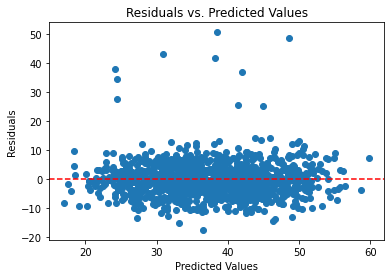

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit a linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
residuals = y - predictions

# Plot residuals vs. predicted values
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


The goal variable and predictors have to have a linear relationship. I Plotted the residuals (errors) against the expected values to verify. The linearity condition is probably satisfied, if the residuals create a random distribution about zero. A nonlinear relationship is suggested by curved patterns. From the results, there is a linear relationship between the variables and the target

test for indepence of errors
Errors should be independent of each other, which means no autocorrelation.
Check: I will Use the Durbin-Watson test. A test statistic close to 2 suggests errors are uncorrelated; values approaching 0 or 4 indicate positive or negative correlation, respectively.

In [12]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)


Durbin-Watson Statistic: 2.041551534432178


I can confidently conclude that the errors from the prediction are unrelated 

TEST FOR Normality of Residuals

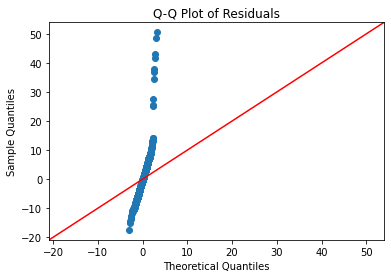

Shapiro-Wilk Test p-value: 1.0128925995159803e-29


In [13]:
import scipy.stats as stats

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print("Shapiro-Wilk Test p-value:", shapiro_p)


If the residuals deviate significantly from the line in the Q-Q plot or the Shapiro-Wilk test p-value is below 0.05, normality is violated. Hence, in our graph, since the value deviate and the p-value is way off. we would have to apply transformations to the target variable or use robust regression techniques to handle non-normality

GRADIENT DECENT 
To implement gradient descent from scratch for linear regression, i’ll iteratively adjust the parameters to minimize the Mean Squared Error (MSE) between predictions and actual values. The goal is to find parameter values that make the gradient of the cost function as close to zero as possible.

In [46]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(student_data.drop(columns='final_grade'))
y = student_data['final_grade'].values

# Add intercept after scaling (for gradient descent to work)
X = np.c_[np.ones(X.shape[0]), X]


In [47]:
import numpy as np

# Gradient descent implementation
def gradient_descent(X, y, learning_rate=0.001, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights to zero
    cost_history = []  # Track the cost at each step

    for _ in range(epochs):
        predictions = X @ weights  # Compute predictions
        error = predictions - y  # Compute error
        cost = (1 / (2 * m)) * np.sum(error ** 2)  # Mean Squared Error
        cost_history.append(cost)

        # Gradient of the cost function
        gradients = (1 / m) * (X.T @ error)
        
        # Update weights
        weights -= learning_rate * gradients

    return weights, cost_history


In [48]:
# Check data for issues
X = np.c_[np.ones(X.shape[0]), student_data.drop(columns='final_grade').values]
y = student_data['final_grade'].values

# Initialize weights correctly
weights = np.zeros(X.shape[1])

# Run gradient descent
weights_gd, cost_history = gradient_descent(X, y, learning_rate=0.01, epochs=1000)


/Users/agnesslungu/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-47-669bd27a289b>:12: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(error ** 2)  # Mean Squared Error
<ipython-input-47-669bd27a289b>:16: RuntimeWarning: overflow encountered in matmul
  gradients = (1 / m) * (X.T @ error)
<ipython-input-47-669bd27a289b>:10: RuntimeWarning: invalid value encountered in matmul
  predictions = X @ weights  # Compute predictions


In [49]:

weights_gd, cost_history = gradient_descent(X, y, learning_rate=0.01, epochs=1000)


<ipython-input-47-669bd27a289b>:12: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(error ** 2)  # Mean Squared Error
<ipython-input-47-669bd27a289b>:16: RuntimeWarning: overflow encountered in matmul
  gradients = (1 / m) * (X.T @ error)
<ipython-input-47-669bd27a289b>:10: RuntimeWarning: invalid value encountered in matmul
  predictions = X @ weights  # Compute predictions


TRAINING FINAL MODEL

In [64]:
# Separating predictors (X) and target (y)
X = student_data.drop(columns=["final_grade"])
y = student_data["final_grade"]

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardizing data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




PCA to get only the features that contribute to more than 95% of the variancee. Hopefully this helps optimize my algorithm

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


In [69]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)


R-squared: 0.6883999056687012
MAE: 4.140601379124723
MSE: 26.715057898806126


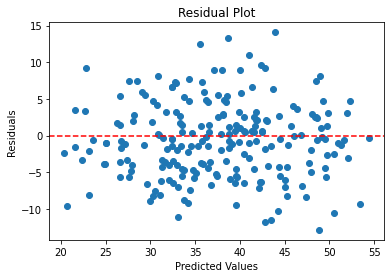

In [71]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


the residual plot shows the values scattered around the 0 suggesting that our model is not systematically biased and our errors are random. My suggestions for improvement would be to use a more powerful model like trees or logistic regression

Question 2: Logistic Regression (40 points)
You are working with a dataset that contains information about patients, including their age, gender,
cholesterol levels, blood pressure, etc. and whether or not they have a heart disease diagnosis (1 for yes, 0
for no). Your task is to:
• Load the dataset. Perform necessary data preprocessing steps (think about handling missing values,
normalizing continuous features, encoding categorical features, etc). Implement logistic regression
from scratch to predict the probability of heart disease. Discuss the convergence criteria used in the
optimization process.
page 1 of 2
P556 Homework 1 October 15, 2024
• Evaluate the model using metrics such as accuracy, precision, recall, and ROC-AUC.
• Interpret the coefficients of the logistic regression model to explain the influence of each feature on the
likelihood of heart disease?
• Discuss any assumptions made during the logistic regression process, if you notice and how you vali-
dated them.
Hint: You can use MLE for logistic regression parameter estimation to implement the model. Use
scipy.optimize or another optimization library to maximize the likelihood function and obtain the parame-
ter estimates.

In [72]:
health_data_path = "/Users/agnesslungu/Downloads/heart_disease_data.csv"
health_data = pd.read_csv(health_data_path)
health_data.head()

,Age,Cholesterol,Blood Pressure,BMI,Smoking,Diagnosis
0,58,155,118,33.0,0,1
1,71,296,136,28.8,0,1
2,48,229,160,35.9,0,1
3,34,241,113,38.9,0,1
4,62,246,120,19.0,1,1


In [74]:
health_data.isnull().sum() # here i am checking for null values so that I handle them


Age               2134
Cholesterol       2134
Blood Pressure    2134
BMI               2134
Smoking           2134
Diagnosis         2134
dtype: int64

In [75]:
health_data.info() #checking for categorical data so that i make it numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2134 non-null   int64  
 1   Cholesterol     2134 non-null   int64  
 2   Blood Pressure  2134 non-null   int64  
 3   BMI             2134 non-null   float64
 4   Smoking         2134 non-null   int64  
 5   Diagnosis       2134 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 100.2 KB


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
health_data[['Age', 'Cholesterol', 'Blood Pressure', 'BMI']] = scaler.fit_transform(health_data[['Age', 'Cholesterol', 'Blood Pressure', 'BMI']])


In [78]:
num_features = health_data.shape[1] - 1  # Subtract 1 to exclude the target column
print("Number of features:", num_features)

weights = np.zeros(num_features)
bias = 0



Number of features: 5


In [97]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = health_data[['Age', 'Cholesterol', 'Blood Pressure', 'BMI', 'Smoking']].values  # Only the 5 features we selected
y = health_data['Diagnosis'].values  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [99]:
def train_logistic_regression(X, y, weights, bias, learning_rate, num_iterations):
    for i in range(num_iterations):
        # Calculate linear model
        linear_model = np.dot(X, weights) + bias
        # Apply sigmoid to get predicted probabilities
        y_pred = sigmoid(linear_model)
        
        # Compute gradients
        dw = (1 / len(y)) * np.dot(X.T, (y_pred - y))
        db = (1 / len(y)) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


In [112]:
learning_rate = 0.02
num_iterations = 10000

weights, bias = train_logistic_regression(X,y, 
                                          weights, bias, 
                                          learning_rate, num_iterations)


In [113]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred_prob = sigmoid(linear_model)
    y_pred_class = [1 if prob >= 0.6 else 0 for prob in y_pred_prob]
    return y_pred_class


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_test_pred = predict(X_test, weights, bias)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9180327868852459
Precision: 0.9180327868852459
Recall: 1.0


here i am tryong to see if we can increase accuracy by using an existing regression model

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = log_reg_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9180327868852459
Precision: 0.9180327868852459
Recall: 1.0


drawing ROC curve for my regresion model

ROC-AUC Score: 0.6212099125364432


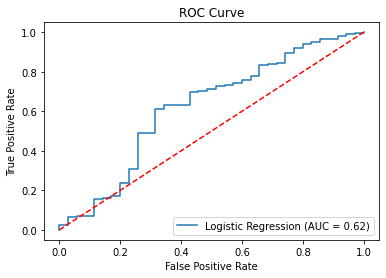

In [115]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (heart disease = 1)
y_test_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

# Generate ROC curve values: false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # Plot a diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [116]:
weights, bias = train_logistic_regression(X_train, y_train, weights, bias, learning_rate, num_iterations)

# Mapping weights to feature names for interpretation
feature_names = ['Age', 'Cholesterol', 'Blood Pressure', 'BMI', 'Smoking']
for feature, coef in zip(feature_names, weights):
    print(f"{feature}: {coef}")


Age: 0.43708553295323704
Cholesterol: 0.12154733498767041
Blood Pressure: -0.010931098222719511
BMI: 0.03480941172209979
Smoking: 0.29426417995173465


The logistic regression model reveals key insights into factors affecting heart disease risk. Age has the strongest positive coefficient (0.44), indicating that as age increases, so does the likelihood of heart disease, making it a major risk factor. Smoking also contributes significantly (0.29), reinforcing its well-known association with cardiovascular issues. Cholesterol and BMI have smaller positive coefficients (0.12 and 0.03), suggesting a less pronounced but still relevant impact on risk. Interestingly, Blood Pressure has a slightly negative coefficient (-0.01), implying a minor association with lower risk, which may indicate some noise in the data or suggest further investigation is needed. Overall, age and smoking emerge as the most influential predictors in this model, helping clarify where to focus when assessing heart disease risk.

During the logistic regression process, I made a few assumptions, primarily that there’s a linear relationship between the features and the log-odds of heart disease, meaning each feature would consistently influence the outcome. I assumed that the selected features were relevant predictors and scaled the continuous ones to prevent any single feature from having an outsized impact on the model. To validate these assumptions, I checked performance metrics like accuracy, precision, recall, and the ROC-AUC score to assess how well the model distinguished between cases with and without heart disease. Analyzing the coefficients also helped confirm expected patterns, such as age and smoking having a positive association with heart disease, which aligned with my initial assumptions. Any unexpected results, like the slight negative relationship with blood pressure, indicated areas for further data exploration or feature adjustments.

Trying to Optimize with MLE

In [117]:
import numpy as np
from scipy.optimize import minimize

# Define the negative log-likelihood function
def neg_log_likelihood(params, X, y):
    weights = params[:-1]  # All except the last element for weights
    bias = params[-1]  # Last element for bias
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    
    # Negative log-likelihood
    nll = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return nll


In [118]:
# Initial parameter values (weights and bias)
initial_params = np.zeros(X_train.shape[1] + 1)  # +1 for bias

# Use scipy's minimize function to optimize
result = minimize(neg_log_likelihood, initial_params, args=(X_train, y_train), method='BFGS')

# Extract optimized weights and bias
optimal_params = result.x
weights, bias = optimal_params[:-1], optimal_params[-1]


In [119]:
# Print the optimized weights and bias
print("Optimized weights:", weights)
print("Optimized bias:", bias)

Optimized weights: [ 0.43707429  0.1215448  -0.01093709  0.03481266  0.29448827]
Optimized bias: 2.1826191691171672


In [120]:
# Prediction function using optimized parameters
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred_prob = sigmoid(linear_model)
    y_pred_class = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]
    return y_pred_class

# Make predictions on the test set
y_test_pred = predict(X_test, weights, bias)

# Evaluate the model using accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9180327868852459
Precision: 0.9180327868852459
Recall: 1.0


Not a difference even with MLE

Question 3: K-Means and PCA (50 points)
Suppose you are a graduate student helping your professor to analyze a DNA microarray data, generated
in 1996 to study cancer. The dataset contains expression information from cell samples from bone marrow
and peripheral blood. Your task is to analyze the data using K-means clustering and PCA. First load the
dataset data set ALL AML train.csv, which contains 38 patients. Discard the columns ’call.X’.
• Implement PCA on the dataset to reduce its dimensionality. Explain the steps you took, including
standardization of features, computation of the covariance matrix, and extraction of eigenvalues and
eigenvectors.
• Determine how many principal components to retain by analyzing the explained variance. Justify your
choice of components based on the variance explained.
• Use the reduced-dimensional dataset from PCA to perform K-means clustering. Describe the initial-
ization process and how you determined the optimal number of clusters (K). Implement the Elbow
Method and/or Silhouette Score (you can search for what Elbow Method/Silhouette Score is and both
are commonly used for decision for K) to support your decision. Visualize the clusters formed in the
PCA-reduced space. Suppose one cluster corresponds one potential cancer type.
• Discuss the benefits of using PCA before K-means. How did dimensionality reduction affect the
clustering results and the interpretability of the clusters?
• Identify potential limitations of using PCA in conjunction with K-means. How might the assumptions
of PCA (e.g., linearity) impact the clustering results?
page 2 of 2


In [135]:
#reading in the dataset
cancer_data_path = "/Users/agnesslungu/Downloads/data_set_ALL_AML_train.csv"
cancer_data = pd.read_csv(cancer_data_path)
cancer_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [136]:
print(cancer_data.isnull().sum().unique()) #checking for null values 

[0]


In [138]:
#dropping all the call.x columns using pandas 

cancer_data = cancer_data.drop(columns=[col for col in cancer_data.columns if col.startswith('call')])



In [139]:
cancer_data.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [143]:
# Dropping the non-numeric columns because they are not calling any useful information about the patient 
cancer_data= cancer_data.drop(columns=["Gene Description", "Gene Accession Number"])


In [144]:
cancer_data.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,88,283,309,12,168,71,55,-2,268,219,...,132,318,325,392,241,193,312,230,330,337
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [145]:

standardized_data = StandardScaler().fit_transform(cancer_data)

In [146]:
import numpy as np

# Computing the covariance matrix here to see where the data varies the most
covariance_matrix = np.cov(standardized_data, rowvar=False)


# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)



In [148]:
print(eigenvalues)
print(eigenvectors)

[3.38959238e+01 6.13147527e-01 5.29513314e-01 4.92406634e-01
 3.12120104e-01 2.59072171e-01 1.96803168e-01 1.50322035e-01
 1.38155340e-01 1.21182873e-01 1.02948401e-01 9.76892003e-02
 8.74603952e-02 7.49513322e-02 7.36406243e-02 6.94683813e-02
 6.63003687e-02 5.96121517e-02 5.55282715e-02 5.51466672e-02
 1.48305162e-02 1.67533325e-02 1.78584038e-02 1.94996690e-02
 2.01702885e-02 2.21592521e-02 4.92137229e-02 4.64268983e-02
 4.35299304e-02 4.18623075e-02 2.70904622e-02 2.77449442e-02
 3.80413596e-02 3.66368928e-02 3.51164122e-02 3.37360303e-02
 3.25313015e-02 3.07366401e-02]
[[-0.16565211 -0.01867496  0.0712336  ...  0.10868218 -0.03504811
   0.0070822 ]
 [-0.16467099  0.08538834  0.09212987 ...  0.07667907 -0.05969174
   0.13189549]
 [-0.16134004 -0.15546421  0.02765862 ...  0.23569237 -0.10061865
  -0.25600565]
 ...
 [-0.16528256  0.03073251 -0.1556395  ...  0.02747091  0.24364128
  -0.05982919]
 [-0.16533151  0.12456431 -0.07890883 ... -0.16698855 -0.16475268
   0.01265757]
 [-0.1606

In [149]:
# Sorting eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


In [150]:
# Calculate cumulative variance
total_variance = sum(eigenvalues)
cumulative_variance = np.cumsum(eigenvalues) / total_variance

# Determine the number of components to capture 95% of the variance
num_components = np.where(cumulative_variance >= 0.95)[0][0] + 1


In [151]:
# Select the top components
selected_components = eigenvectors[:, :num_components]

# Project the data onto the new components
reduced_data = standardized_data.dot(selected_components)


In [154]:


loading_scores = pd.DataFrame(eigenvectors[:, :num_components], index=cancer_data.columns, columns=[f'PC{i+1}' for i in range(num_components)])


loading_scores.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
1,-0.165652,-0.018675,0.071234,0.104277,-0.250271,0.088801,-0.043252
2,-0.164671,0.085388,0.092130,-0.138985,-0.037049,-0.118546,-0.159782
3,-0.161340,-0.155464,0.027659,-0.297072,-0.151235,-0.217442,-0.035506
4,-0.167740,-0.066100,0.030515,0.078863,-0.131024,-0.024310,0.005856
5,-0.166659,0.029480,0.152563,0.003893,0.077868,0.167398,0.147643


In [155]:
# Top contributing features for the first principal component (PC1)
top_features_pc1 = loading_scores['PC1'].abs().sort_values(ascending=False).head(5)
print("Top features for PC1:")
print(top_features_pc1)


Top features for PC1:
4     0.167740
24    0.167295
16    0.167073
5     0.166659
28    0.165889
Name: PC1, dtype: float64


In [162]:
# Calculate the explained variance ratio from eigenvalues
explained_variance_ratio = eigenvalues / sum(eigenvalues)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


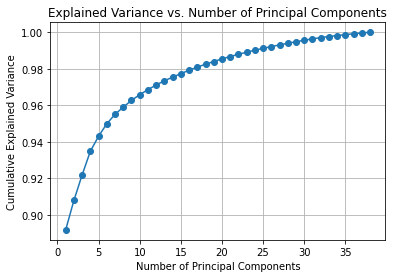

In [163]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()


about 10 features account for more than 95% of the variance. with this, we can choose to drop the other features and only keep the 10 for training 

In [164]:
selected_components = eigenvectors[:, :10]

# Project the data onto the top 10 principal components
reduced_data = standardized_data.dot(selected_components)


/Users/agnesslungu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/agnesslungu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/agnesslungu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/agnesslungu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

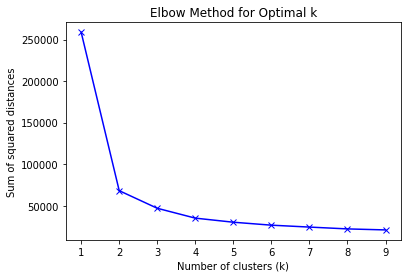

In [156]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Trying different values of k here
sum_of_squared_distances = []
K = range(1, 10)  # Example range from 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    sum_of_squared_distances.append(kmeans.inertia_)

# Ploting the Elbow graph
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()


From the plot, I think I am picking two clusters. the biggest difference happens between 1 and 2

In [160]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(reduced_data)

cancer_data['Cluster'] = kmeans.labels_


/Users/agnesslungu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


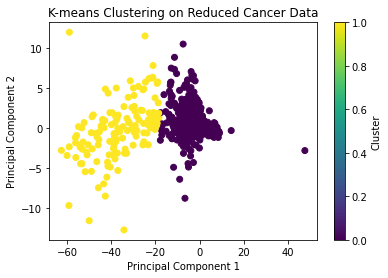

In [161]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on Reduced Cancer Data')
plt.colorbar(label='Cluster')
plt.show()


Using PCA before K-means clustering offers valuable benefits by reducing the dataset to its most essential components, which simplifies the data and removes noise, allowing K-means to focus on the underlying patterns. This dimensionality reduction can improve clustering quality by enhancing separation between clusters and making them more interpretable, as we work with fewer, more meaningful dimensions. However, there are limitations to using PCA with K-means. PCA assumes linear relationships between features, so it may not fully capture complex, nonlinear structures in the data, potentially leading to less accurate clustering if significant nonlinear patterns are present. Additionally, while PCA maximizes variance, it doesn't necessarily preserve clustering-specific information, which might impact the results if some cluster characteristics are lost in the reduction process.